# 영화 관객수 예측

# 목적 : 주어진 데이터를 바탕으로 영화의 관객수를 예측 해보세요!

1. movies_train.csv / movies_test.csv<br>
title : 영화의 제목<br>
distributor : 배급사<br>
genre : 장르<br>
release_time : 개봉일<br>
time : 상영시간(분)<br>
screening_rat : 상영등급<br>
director : 감독이름<br>
dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)<br>
dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)<br>
num_staff : 스텝수<br>
num_actor : 주연배우수<br>
box_off_num : 관객수<br>

In [1]:
# 관객수 예측이므로 box_off_num을 y로 놓아야해

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('./data/movies_train.csv', encoding = "cp949")
test = pd.read_csv('./data/movies_test.csv', encoding = "cp949")

# 인코딩 방식 (한국어로) encoding = "cp949" or encoding = "utf-8"

In [3]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [4]:
test.head()  # box_off_num 없음

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [5]:
train.info()  # object 는 문자열 타입을 의미

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


# 데이터 전처리

In [6]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

# dir_prev_bfnum 컬럼 제거 ; drop (결측치 빼는 게 아니라, 컬럼 자체 제거)
# axis = 0 ; 행
# axis = 1 ; 열

In [7]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,251,2,483387


In [8]:
# 감독명 : 너무 다양해서 제거 (카테고리형으로 변환할 수 있으나 의미 없으므로 제거)
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [9]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,1,251,2,483387


In [10]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [11]:
train.distributor.value_counts()   # train.distributor의 종류가 몇 개인지 확인 / 디폴트 ; 내림차순

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [12]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
# 카테고리를 6개(상위5개+기타1개)로 보겠다 ~

distributor_list = train.distributor.value_counts()[:5] # 상위 5개 가져오기

def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [13]:
train['distributor']

0       롯데엔터테인먼트
1         (주)쇼박스
2         (주)쇼박스
3         (주)NEW
4             기타
         ...    
595       (주)NEW
596       (주)쇼박스
597    (주)마운틴픽쳐스
598    CJ 엔터테인먼트
599    CJ 엔터테인먼트
Name: distributor, Length: 600, dtype: object

In [14]:
test['distributor']

0             기타
1         (주)쇼박스
2      CJ 엔터테인먼트
3         (주)쇼박스
4      CJ 엔터테인먼트
         ...    
238           기타
239           기타
240           기타
241           기타
242           기타
Name: distributor, Length: 243, dtype: object

In [15]:
# 개봉일을 바탕으로 년,월 변수 생성
# (release_time 컬럼은 str타입)
train['년'] = train['release_time'].apply(lambda x: int(x[:4])) # create new column
train['월'] = train['release_time'].apply(lambda x: int(x[5:7])) # create new column
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4])) # create new column
test['월'] = test['release_time'].apply(lambda x: int(x[5:7])) # create new column
test =  test.drop(['release_time'],axis = 1)

In [16]:
train

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,년,월
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0,91,2,23398,2012,11
1,(주)쇼박스,느와르,130,청소년 관람불가,2,387,3,7072501,2015,11
2,(주)쇼박스,액션,123,15세 관람가,4,343,4,6959083,2013,6
3,(주)NEW,코미디,101,전체 관람가,2,20,6,217866,2012,7
4,기타,코미디,108,15세 관람가,1,251,2,483387,2010,11
...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,111,청소년 관람불가,1,510,7,1475091,2014,8
596,(주)쇼박스,드라마,127,15세 관람가,1,286,6,1716438,2013,3
597,(주)마운틴픽쳐스,공포,99,청소년 관람불가,0,123,4,2475,2010,9
598,CJ 엔터테인먼트,느와르,102,15세 관람가,0,431,4,2192525,2015,5


In [17]:
test

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,년,월
0,기타,느와르,125,청소년 관람불가,2,304,3,2010,1
1,(주)쇼박스,멜로/로맨스,113,12세 관람가,4,275,3,2010,1
2,CJ 엔터테인먼트,드라마,115,12세 관람가,3,419,7,2010,1
3,(주)쇼박스,액션,116,15세 관람가,2,408,2,2010,2
4,CJ 엔터테인먼트,공포,110,15세 관람가,1,380,1,2010,2
...,...,...,...,...,...,...,...,...,...
238,기타,드라마,78,15세 관람가,1,4,4,2015,11
239,기타,다큐멘터리,86,12세 관람가,0,18,2,2015,10
240,기타,느와르,107,청소년 관람불가,0,224,4,2015,10
241,기타,드라마,102,청소년 관람불가,1,68,7,2015,10


##### 원핫 인코딩
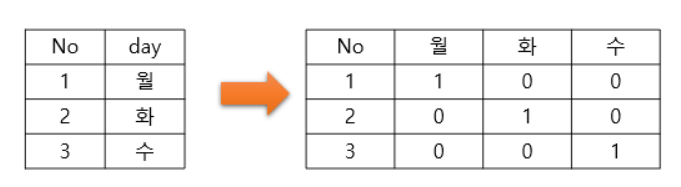

In [18]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [19]:
train

,time,dir_prev_num,num_staff,num_actor,box_off_num,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,23398,2012,11,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,130,2,387,3,7072501,2015,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,123,4,343,4,6959083,2013,6,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,101,2,20,6,217866,2012,7,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,108,1,251,2,483387,2010,11,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,111,1,510,7,1475091,2014,8,1,0,0,...,0,0,0,0,0,0,0,0,0,1
596,127,1,286,6,1716438,2013,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
597,99,0,123,4,2475,2010,9,0,1,0,...,0,0,0,0,0,0,0,0,0,1
598,102,0,431,4,2192525,2015,5,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
test

,time,dir_prev_num,num_staff,num_actor,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,125,2,304,3,2010,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,113,4,275,3,2010,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,115,3,419,7,2010,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,116,2,408,2,2010,2,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,110,1,380,1,2010,2,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,78,1,4,4,2015,11,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
239,86,0,18,2,2015,10,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
240,107,0,224,4,2015,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
241,102,1,68,7,2015,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
# box_off_num 빼서 y로 넣기
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [22]:
train_x

,time,dir_prev_num,num_staff,num_actor,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,2012,11,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,130,2,387,3,2015,11,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,123,4,343,4,2013,6,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,101,2,20,6,2012,7,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,108,1,251,2,2010,11,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,111,1,510,7,2014,8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
596,127,1,286,6,2013,3,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
597,99,0,123,4,2010,9,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
598,102,0,431,4,2015,5,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:
train_y

0        23398
1      7072501
2      6959083
3       217866
4       483387
        ...   
595    1475091
596    1716438
597       2475
598    2192525
599    7166532
Name: box_off_num, Length: 600, dtype: int64

In [27]:
train_y.shape, type(train_y)

((600,), pandas.core.series.Series)

In [28]:
pd.DataFrame(train_y)

,box_off_num
0,23398
1,7072501
2,6959083
3,217866
4,483387
...,...
595,1475091
596,1716438
597,2475
598,2192525


# Train_test_split

train : 600개  
(문제 o, 정답 o)  

model ; train(600)을 넣어서 훈련은 가능 

test : 300개  
(문제 o, 정답 x)  

model에 test를 통해 평가는 불가능(정답이 없어서)  

----------------------------------------------------------

--> new

train을 train'(480개)와 val(120개)로 나눔

train' : 480개  
(문제 o, 정답 o)

train : 120개  
(문제 o, 정답 o)  

이제 훈련도 가능하고 평가도 가능

In [29]:
# test 세트에는 정답이 없어서 채점이 불가하므로
# 정답이 있는 데이터를 확보하여 평가에 사용하기 위해 train과 validation으로 데이터세트분리

from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.2)

In [30]:
train_x   # 훈련용

,time,dir_prev_num,num_staff,num_actor,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
524,95,1,115,2,2015,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
498,139,4,628,3,2015,7,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
404,80,0,51,3,2012,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
178,125,0,456,3,2015,2,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
577,108,0,8,1,2015,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,93,2,197,3,2012,5,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
480,102,0,101,3,2012,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
355,80,0,0,0,2015,10,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
211,97,0,7,3,2015,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
val_x # 검증용

,time,dir_prev_num,num_staff,num_actor,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
574,61,2,6,8,2012,9,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
462,79,0,14,1,2015,5,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
112,133,1,308,2,2012,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
21,90,0,228,1,2015,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
578,90,1,167,7,2014,8,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,119,2,331,3,2013,7,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36,67,0,1,5,2014,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
326,108,2,369,2,2015,11,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
525,95,0,16,11,2010,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
model=RandomForestRegressor(n_estimators=100)  
# 트리모델을 여러 개 합친게 RandomForestRegressor/ 트리를 몇개 합칠거냐 n_estimators(많으면 많을수록 정확도는 보장 못하지만, 학습할게 그만큼 많아진다는 의미)
model.fit(train_x,train_y)

RandomForestRegressor()

# MAE (1번 제곱)
# MSE (2번 제곱) ; 보통 R2_SCORE와 연관
# R2_SCORE ; 회귀모델의 성능지표 , 1에 가까울수록 좋은 성능

In [33]:
# box_off_num은 숫자예측이므로 회귀 (MSE, MAE 등을 사용)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [34]:
val_predict_y = model.predict(val_x)

In [35]:
val_predict_y  # 모델을 이용해서 학습한 예측값

array([1.88693300e+04, 5.01709800e+04, 2.59974756e+06, 1.41068510e+05,
       2.59134150e+05, 3.18770558e+06, 5.18264800e+04, 1.12058770e+05,
       2.25508304e+06, 1.42049657e+06, 1.82934230e+05, 8.14602104e+06,
       1.40710375e+06, 7.84040810e+05, 6.71354000e+03, 9.42752930e+05,
       6.05443000e+03, 9.58569800e+04, 9.38110980e+05, 9.01236380e+05,
       8.39893000e+03, 6.45496680e+05, 1.54688218e+06, 1.11304061e+06,
       2.41204810e+05, 2.78841830e+05, 5.75960000e+03, 3.82060210e+05,
       1.22091600e+04, 8.71138700e+05, 1.28881600e+04, 7.71235000e+03,
       3.10955510e+05, 1.24047026e+06, 7.64114000e+03, 3.45780660e+05,
       2.33621200e+04, 2.07950800e+04, 1.10723110e+05, 9.50618170e+05,
       3.28730713e+06, 2.13014670e+06, 1.71716341e+06, 2.07414000e+03,
       2.35918210e+05, 8.72597140e+05, 4.15071960e+05, 3.29544000e+03,
       1.83770800e+04, 2.38337932e+06, 6.88376000e+03, 3.71484000e+03,
       1.06947460e+05, 8.00133861e+06, 1.72756000e+03, 1.90331600e+06,
      

In [36]:
val_y  # 정답

574        188
462        112
112    4720050
21       44074
578      35567
        ...   
472    5508299
36        2923
326    5443049
525       2732
593       1132
Name: box_off_num, Length: 120, dtype: int64

In [37]:
val_y = val_y.values
val_y

array([    188,     112, 4720050,   44074,   35567, 3350311,   57029,
         44216, 7759711,  151550,    3094, 2192276,   57261, 1201033,
          1958,    2386,     971,    4449,    1440,  129576,    6034,
         27083,  497880,  356436,   47105,   12696,    1526,     389,
           600,  857038,   21317,     494,   12457,  654407,     574,
        849635, 2541603,    2070,     948,  334323,  386074,  462714,
       1980050,     329,   10142, 1755181, 2242510,    4586,   23802,
       4598985,    9089,     542,    3536, 8666208,    2186, 1612554,
       1131154, 1546132,      42,     652,   56105,    1504,    5014,
         13429,     808,   39916,  133665,     703,    1536,  471248,
          3399,    5317,   68312, 1122225, 1201944,     366,     721,
          1209,    4778,   96080, 1744585,    1617,    2951,    3199,
         72052,   10203,   22525,     842, 2963652,  169064,    2475,
          4092,     241,    9566, 1716438, 1717566,   10942,  790959,
           938,     

In [39]:
a = mean_squared_error(val_y, val_predict_y)  
a

1896688377724.1245

In [40]:
b = mean_absolute_error(val_y, val_predict_y) # 평균적으로 89만 정도 오차가 나는구나~
b

701152.1299166667

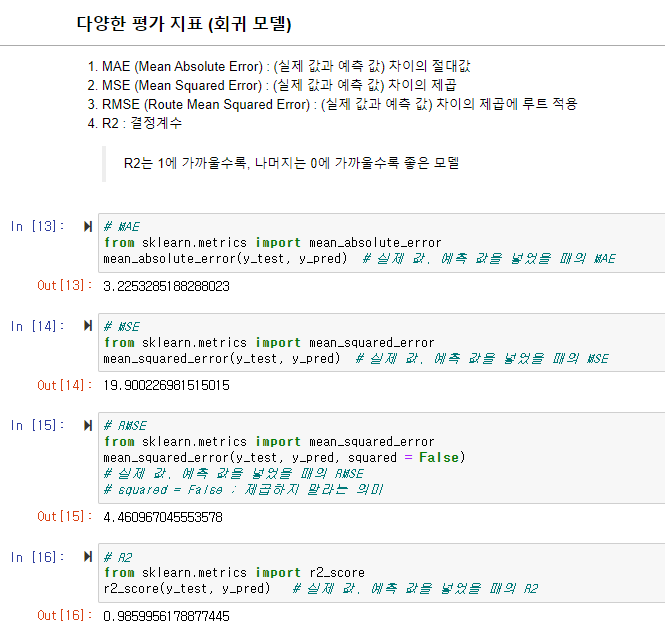